# Chapter 1: Project Introduction & Overview

---

## 1.1 Project Header

# MediSimplifier
## Medical Text Simplification Using LoRA Fine-Tuning

**Course:** Technion DS25 Deep Learning Final Project  
**Students:** Guy Dor, Shmulik Avraham  
**Deadline:** February 8, 2026  

---

## 1.2 Project Motivation & Objectives

### Problem Statement

Medical discharge summaries are critical documents that patients receive upon leaving healthcare facilities. However, these documents are typically written in complex medical terminology that is difficult for most patients to understand. Studies show that the average medical document is written at a college reading level, while the average American adult reads at an 8th-grade level. This gap leads to:

- Poor medication adherence
- Missed follow-up appointments
- Increased hospital readmissions
- Patient anxiety and confusion

### Solution

We propose **MediSimplifier**, a system that uses fine-tuned Large Language Models (LLMs) to automatically simplify medical discharge summaries to a 6th-grade reading level while preserving all critical medical information.

### Objectives

1. **Simplify** complex medical discharge summaries into plain language accessible to patients with a 6th-grade reading level
| Reason | Explanation |
|--------|-------------|
| **Health literacy statistics** | About 36% of US adults have basic or below-basic health literacy |
| **AMA recommendation** | American Medical Association recommends patient materials at 6th grade level |
| **Wide accessibility** | Most adults can comfortably read at this level, regardless of education |
| **Standard practice** | CDC, NIH, and major hospitals target 6th-8th grade for patient materials |

3. **Compare** medical-domain pre-trained LLMs (OpenBioLLM-8B, BioMistral-7B-DARE) against general-purpose LLMs (Mistral-7B)
4. **Evaluate** the effectiveness of LoRA fine-tuning compared to zero-shot performance
5. **Conduct** comprehensive ablation studies on LoRA hyperparameters (rank, target modules) and dataset size
6. **Answer** five research questions about medical text simplification using LLMs

---

## 1.3 High-Level Architecture

The MediSimplifier project follows a 5-stage pipeline:

```
┌─────────────────────────────────────────────────────────────────────────────────┐
│                         MediSimplifier Pipeline Architecture                    │
└─────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────┐     ┌──────────────────────┐     ┌──────────────────────┐
│   STAGE 1            │     │   STAGE 2            │     │   STAGE 3            │
│   Ground Truth       │     │   Baseline           │     │   LoRA               │
│   Generation         │     │   Evaluation         │     │   Fine-Tuning        │
│                      │     │                      │     │                      │
│   Claude Opus 4.5    │     │   Zero-Shot          │     │   Train Student      │
│   (Teacher Model)    │     │   Inference          │     │   Models             │
│         │            │     │         │            │     │         │            │
│         ▼            │     │         ▼            │     │         ▼            │
│   Simplified         │     │   Baseline           │     │   LoRA Adapters      │
│   Texts (Labels)     │     │   Predictions        │     │                      │
└──────────┬───────────┘     └──────────┬───────────┘     └──────────┬───────────┘
           │                            │                            │
           ▼                            ▼                            ▼
┌──────────────────────┐     ┌──────────────────────┐     ┌──────────────────────┐
│   Instruction        │     │   ROUGE-L, SARI      │     │   STAGE 4            │
│   Tuning Dataset     │     │   BERTScore          │     │   Post Fine-Tuning   │
│                      │     │   Flesch-Kincaid     │     │   Evaluation         │
└──────────────────────┘     └──────────────────────┘     └──────────┬───────────┘
                                                                      │
                                                                      ▼
                             ┌────────────────────────────────────────────────────┐
                             │                    STAGE 5                         │
                             │              Comparison & Analysis                 │
                             │                                                    │
                             │  • Baseline vs Fine-tuned Comparison               │
                             │  • Medical vs General Model Comparison             │
                             │  • Ablation Studies (Rank, Modules, Dataset Size)  │
                             │  • Statistical Significance Tests                  │
                             │  • Research Questions Answered                     │
                             └────────────────────────────────────────────────────┘
```

---

## 1.4 Models Overview

| Role | Model | Type | Parameters | Base Architecture | Notes |
|------|-------|------|------------|-------------------|-------|
| **Teacher** | Claude Opus 4.5 | API | N/A | Anthropic | Generates ground truth simplified texts |
| **Student 1** | OpenBioLLM-8B | Medical | 8B | Llama-3 | Pre-trained on biomedical literature |
| **Student 2** | BioMistral-7B-DARE | Medical | 7B | Mistral | Pre-trained on PubMed abstracts |
| **Student 3** | Mistral-7B | General | 7B | Mistral | Control group (no medical pre-training) |

---

## 1.5 Research Questions

This project aims to answer the following research questions:

| # | Research Question | Comparison | Expected Outcome |
|---|-------------------|------------|------------------|
| **RQ1** | Does medical domain pre-training improve simplification? | BioMistral-7B-DARE vs. Mistral-7B | Medical > General |
| **RQ2** | Which medical model performs best? | OpenBioLLM-8B vs. BioMistral-7B-DARE | TBD (architecture differences) |
| **RQ3** | How much does LoRA fine-tuning improve over zero-shot? | Baseline vs. Fine-tuned | Significant improvement |
| **RQ4** | What is the optimal LoRA rank? | r = 8, 16, 32 | r=16 optimal |
| **RQ5** | Does medical vs. general gap persist after fine-tuning? | All models post-training | Gap narrows |
| **RQ6** | Which attention modules matter most for simplification? | q_only vs. q_v vs. all_attn | q_v sufficient |
| **RQ7** | How much labeled data is sufficient for LoRA fine-tuning? | 2K vs. 4K vs. 8K samples | Diminishing returns |
| **RQ8** | Is there inverse correlation between baseline and improvement? | Zero-shot vs. fine-tuned gains | Worse baseline → bigger gain |
| **RQ9** | What is the parameter efficiency of target module selection? | Trainable params vs. metric gains | Diminishing returns |
| **RQ10** | Which model produces most consistent output quality? | FK-Grade standard deviation | Lower std = more reliable |
| **RQ11** | Do fine-tuned models match ground truth readability? | Model FK vs. reference FK | Within ±1 grade |

**Research Question Details:**

- **RQ1-RQ5:** Core research questions addressing domain pre-training effects and LoRA fine-tuning impact on medical text simplification.

- **RQ6 (Target Modules):** The LoRA paper (Hu et al. 2021) recommends q_proj and v_proj, but text simplification may benefit from different configurations. This ablation tests minimal adaptation (q_only), standard LoRA (q_v), and full attention adaptation (all_attn).

- **RQ7 (Dataset Size):** With expensive API labeling (~$150-200 for ground truth generation), understanding data efficiency is crucial. This ablation tests whether 25% (2K), 50% (4K), or 100% (8K) of labeled data is sufficient for effective fine-tuning.

- **RQ8 (Baseline-Improvement Correlation):** Investigates whether models with weaker zero-shot performance benefit more from fine-tuning, which would suggest LoRA is particularly effective at addressing initial capability gaps.

- **RQ9 (Parameter Efficiency):** Analyzes the trade-off between additional trainable parameters (8.4M → 27.3M) and metric improvements to determine if full attention adaptation is cost-effective.

- **RQ10 (Output Consistency):** Beyond average quality, examines output variance to identify which model produces the most reliable simplifications across diverse medical texts.

- **RQ11 (Ground Truth Ceiling):** Tests whether fine-tuned models can match the readability level of Claude-generated ground truth, validating the effectiveness of knowledge distillation.
---

## 1.6 Notebook Structure

This project is organized into **10 chapters**, with a hardware transition at Chapter 6:

| Chapter | Title | Hardware | Description |
|---------|-------|----------|-------------|
| 1 | Project Introduction & Overview | M4 Max | Motivation, objectives, architecture, research questions |
| 2 | Environment Setup | M4 Max | Dependencies, hardware verification, configuration |
| 3 | Dataset Preparation | M4 Max | Data loading, filtering, statistics |
| 4 | Ground Truth Generation | M4 Max | Claude API labeling, quality check, split, instruction dataset |
| 5 | Baseline Evaluation (Zero-Shot) | H200 SXM | Zero-shot inference with metrics against ground truth |
| 6 | LoRA Fine-Tuning | H200 SXM | Ablation studies (18 runs) + full training (3 runs) |
| 7 | Post Fine-Tuning Evaluation | H200 SXM | Evaluation and comparison with baseline |
| 8 | Results Analysis | M4 Max | Comprehensive analysis and research question answers |
| 9 | Conclusions | M4 Max | Summary, limitations, future work |

---

## 1.7 Hardware Configuration

This project uses a **dual-hardware approach** to balance local development with cloud GPU training:

| Phase | Hardware | Backend | Chapters | Purpose |
|-------|----------|---------|----------|---------|
| **Development & Baseline** | Apple M4 Max, 128GB RAM | PyTorch MPS | 1-4, 8+ | Data prep, API labeling, zero-shot evaluation |
| **Training & Ablation** | RunPod H200 SXM, 80GB HBM3 | PyTorch CUDA | 5-7 | LoRA fine-tuning, ablation studies |

### Local Hardware 

| Component | Specification |
|-----------|---------------|
| **Processor** | Apple M4 Max |
| **Memory** | 128GB Unified RAM |
| **GPU Backend** | PyTorch MPS (Metal Performance Shaders) |
| **Storage** | SSD (sufficient for models and data) |
| **Use Cases** | Dataset preparation, Claude API calls, zero-shot inference |

### Cloud Hardware 

| Component | Specification |
|-----------|---------------|
| **Provider** | RunPod |
| **GPU** | NVIDIA H200 SXM |
| **GPU Memory** | 80GB HBM3 |
| **Backend** | PyTorch CUDA |
| **Use Cases** | LoRA fine-tuning, ablation studies, post-training evaluation |

### Hardware Migration Rationale

The project initially attempted Chapter 6 on M4 Max (MPS backend), but encountered significant performance issues:
- **MPS Training Speed:** ~8 hours per ablation run (vs. ~20 min expected on CUDA)
- **Memory Pressure:** 80GB+ swap usage during training
- **Resolution:** Migrated to RunPod H200 SXM for ~10x speedup

---

## 1.8 Project Deliverables

| Deliverable | Format | Description |
|-------------|--------|-------------|
| **Technical Report** | PDF (IEEE format) | Full methodology, results, and analysis |
| **Presentation** | PPTX/PDF (15 slides) | Project overview, methodology, results, conclusions |
| **Code Repository** | GitHub | All source code, configs, and notebooks |
| **Trained Models** | HuggingFace Hub | LoRA adapters for each student model |
| **Dataset** | HuggingFace Hub | Labeled instruction tuning dataset |

---

# Chapter 2: Environment Setup

---

## 2.1 Install Dependencies

Install all required Python packages for the project.

In [1]:
# ============================================================================
# Verify Required Libraries Are Installed
# ============================================================================

import importlib  # Import the importlib module to check if packages are installed
import subprocess  # Import subprocess to get package versions
import sys  # Import sys for Python version info

# Define all required packages with their import names and descriptions
# Format: (import_name, pip_name, description)
REQUIRED_PACKAGES = [  # List of tuples containing package information
    # Core deep learning and transformer libraries
    ("torch", "torch", "PyTorch deep learning framework"),  # PyTorch
    ("transformers", "transformers", "HuggingFace library for pre-trained language models"),  # Transformers
    ("peft", "peft", "Parameter-Efficient Fine-Tuning library for LoRA"),  # PEFT
    ("datasets", "datasets", "HuggingFace library for dataset loading and processing"),  # Datasets
    ("evaluate", "evaluate", "HuggingFace library for evaluation metrics"),  # Evaluate
    
    # Evaluation metric libraries
    ("rouge_score", "rouge-score", "ROUGE metrics for text summarization evaluation"),  # ROUGE
    ("bert_score", "bert-score", "BERTScore for semantic similarity evaluation"),  # BERTScore
    ("sacrebleu", "sacrebleu", "BLEU score implementation"),  # SacreBLEU
    ("textstat", "textstat", "Readability metrics (Flesch-Kincaid, etc.)"),  # Textstat
    ("easse", "easse", "SARI metric for sentence simplification evaluation"),  # EASSE
    
    # Training acceleration libraries
    ("accelerate", "accelerate", "HuggingFace library for distributed training"),  # Accelerate
    ("bitsandbytes", "bitsandbytes", "Library for 8-bit quantization (memory efficiency)"),  # BitsAndBytes
    
    # Data analysis and visualization libraries
    ("pandas", "pandas", "Data manipulation and analysis"),  # Pandas
    ("numpy", "numpy", "Numerical computing"),  # NumPy
    ("matplotlib", "matplotlib", "Plotting library"),  # Matplotlib
    ("seaborn", "seaborn", "Statistical data visualization"),  # Seaborn
    
    # API and utility libraries
    ("anthropic", "anthropic", "Official Anthropic API client for Claude"),  # Anthropic
    ("tqdm", "tqdm", "Progress bars for loops"),  # TQDM
]

def check_package_installed(import_name):  # Function to check if a package is installed
    """Check if a package is installed and return its version if available."""
    try:  # Try to import the package
        module = importlib.import_module(import_name)  # Attempt to import
        version = getattr(module, '__version__', 'unknown')  # Get version if available
        return True, version  # Return success and version
    except ImportError:  # Package not installed
        return False, None  # Return failure

# ============================================================================
# Check All Required Packages
# ============================================================================

print("=" * 70)  # Print separator line
print("DEPENDENCY VERIFICATION")  # Print section header
print("=" * 70)  # Print separator line
print(f"\nPython Version: {sys.version.split()[0]}\n")  # Display Python version

installed_packages = []  # List to store installed packages
missing_packages = []  # List to store missing packages

# Check each required package
for import_name, pip_name, description in REQUIRED_PACKAGES:  # Iterate through packages
    is_installed, version = check_package_installed(import_name)  # Check if installed
    
    if is_installed:  # Package is installed
        version_str = str(version) if version else 'unknown'  # Convert version to string (handles tuples)
        installed_packages.append((import_name, pip_name, version_str, description))  # Add to installed list
        print(f"✓ {pip_name:20} (v{version_str:15}) - {description}")  # Print success
    else:  # Package is missing
        missing_packages.append((import_name, pip_name, description))  # Add to missing list
        print(f"✗ {pip_name:20} {'MISSING':17} - {description}")  # Print missing

# ============================================================================
# Summary and Installation Instructions
# ============================================================================

print("\n" + "=" * 70)  # Print separator line
print("VERIFICATION SUMMARY")  # Print section header
print("=" * 70)  # Print separator line

print(f"\n📊 Results:")  # Section header
print(f"   Installed: {len(installed_packages)}/{len(REQUIRED_PACKAGES)} packages")  # Count installed
print(f"   Missing:   {len(missing_packages)}/{len(REQUIRED_PACKAGES)} packages")  # Count missing

if missing_packages:  # If there are missing packages
    print(f"\n⚠️  WARNING: {len(missing_packages)} required package(s) are missing!\n")  # Warning
    print("To install missing packages, run the following command(s):\n")  # Instructions
    
    # Generate pip install command for all missing packages
    missing_pip_names = [pip_name for _, pip_name, _ in missing_packages]  # Get pip names
    install_command = "pip install " + " ".join(missing_pip_names)  # Create install command
    print(f"   {install_command}\n")  # Print install command
    
    print("Or install individually:")  # Alternative instructions
    for import_name, pip_name, description in missing_packages:  # Iterate through missing
        print(f"   pip install {pip_name}  # {description}")  # Print individual command
    
    # Set flag indicating not all dependencies are met
    ALL_DEPENDENCIES_MET = False  # Set flag to False
    print(f"\n❌ Please install missing packages before proceeding.")  # Final warning
else:  # All packages installed
    ALL_DEPENDENCIES_MET = True  # Set flag to True
    print(f"\n✓ All required dependencies are installed!")  # Success message

print("\n" + "=" * 70)  # Print separator line

DEPENDENCY VERIFICATION

Python Version: 3.11.13

✓ torch                (v2.9.1          ) - PyTorch deep learning framework
✓ transformers         (v4.57.3         ) - HuggingFace library for pre-trained language models
✓ peft                 (v0.18.1         ) - Parameter-Efficient Fine-Tuning library for LoRA
✓ datasets             (v4.4.2          ) - HuggingFace library for dataset loading and processing
✓ evaluate             (v0.4.6          ) - HuggingFace library for evaluation metrics
✓ rouge-score          (vunknown        ) - ROUGE metrics for text summarization evaluation
✓ bert-score           (v0.3.12         ) - BERTScore for semantic similarity evaluation
✓ sacrebleu            (v2.5.1          ) - BLEU score implementation
✓ textstat             (v(0, 7, 12)     ) - Readability metrics (Flesch-Kincaid, etc.)
✓ easse                (vunknown        ) - SARI metric for sentence simplification evaluation
✓ accelerate           (v1.12.0         ) - HuggingFace library fo

## 2.2 Import Libraries

Import all required libraries and set random seeds for reproducibility.

In [2]:
# ============================================================================
# Standard Library Imports
# ============================================================================

import os  # Operating system interface for environment variables and file operations
import sys  # System-specific parameters and functions
import json  # JSON encoding and decoding for saving/loading configurations
import random  # Random number generation for reproducibility
import warnings  # Warning control to suppress unnecessary messages
from pathlib import Path  # Object-oriented filesystem paths
from datetime import datetime  # Date and time operations for logging
from typing import Dict, List, Optional, Tuple, Any  # Type hints for better code documentation

# ============================================================================
# Data Science Libraries
# ============================================================================

import numpy as np  # Numerical computing library for array operations
import pandas as pd  # Data manipulation and analysis library

# ============================================================================
# Visualization Libraries
# ============================================================================

import matplotlib.pyplot as plt  # Plotting library for creating figures
import seaborn as sns  # Statistical visualization library built on matplotlib

# ============================================================================
# PyTorch and Deep Learning Libraries
# ============================================================================

import torch  # PyTorch deep learning framework
import torch.nn as nn  # Neural network modules
from torch.utils.data import DataLoader  # Data loading utilities

# ============================================================================
# HuggingFace Libraries
# ============================================================================

from transformers import (  # HuggingFace transformers library
    AutoTokenizer,  # Automatic tokenizer loading based on model name
    AutoModelForCausalLM,  # Automatic causal language model loading
    TrainingArguments,  # Configuration for training parameters
    Trainer,  # High-level training API
    DataCollatorForLanguageModeling,  # Data collator for language modeling
    BitsAndBytesConfig,  # Configuration for quantization
)

from peft import (  # Parameter-Efficient Fine-Tuning library
    LoraConfig,  # LoRA configuration
    get_peft_model,  # Function to wrap model with LoRA
    PeftModel,  # PEFT model class
    TaskType,  # Task type enum for LoRA
)

from datasets import (  # HuggingFace datasets library
    load_dataset,  # Function to load datasets from HuggingFace Hub
    Dataset,  # Dataset class
    DatasetDict,  # Dictionary of datasets for train/val/test splits
)

import evaluate  # HuggingFace evaluation metrics library

# ============================================================================
# Evaluation Metric Libraries
# ============================================================================

import textstat  # Library for calculating readability metrics
from rouge_score import rouge_scorer  # ROUGE metric implementation

# ============================================================================
# API and Utility Libraries
# ============================================================================

import anthropic  # Official Anthropic API client for Claude
from tqdm.auto import tqdm  # Progress bar library with auto notebook detection

# ============================================================================
# Suppress Warnings
# ============================================================================

warnings.filterwarnings('ignore')  # Suppress all warnings for cleaner output

# ============================================================================
# Set Random Seeds for Reproducibility
# ============================================================================

SEED = 42  # Define global random seed for reproducibility

random.seed(SEED)  # Set Python random seed
np.random.seed(SEED)  # Set NumPy random seed
torch.manual_seed(SEED)  # Set PyTorch CPU random seed

# Set PyTorch MPS (Metal Performance Shaders) seed if available
if torch.backends.mps.is_available():  # Check if MPS backend is available
    torch.mps.manual_seed(SEED)  # Set MPS random seed for Apple Silicon

# Set PyTorch CUDA seed if available (for potential GPU usage)
if torch.cuda.is_available():  # Check if CUDA is available
    torch.cuda.manual_seed_all(SEED)  # Set CUDA random seed for all GPUs

# Print confirmation of imports and seed setting
print(f"✓ All libraries imported successfully")  # Confirmation message
print(f"✓ Random seed set to: {SEED}")  # Display seed value

✓ All libraries imported successfully
✓ Random seed set to: 42


## 2.3 Verify Hardware Backend

Check and configure the appropriate hardware backend (MPS for Apple Silicon, CUDA for NVIDIA, or CPU).

In [3]:
# ============================================================================
# Hardware Backend Detection and Configuration
# ============================================================================

# Check for MPS (Metal Performance Shaders) availability on Apple Silicon
if torch.backends.mps.is_available():  # Check if MPS backend is available
    # Verify that MPS is actually built into this PyTorch installation
    if torch.backends.mps.is_built():  # Double-check MPS is built
        DEVICE = torch.device("mps")  # Set device to MPS for Apple Silicon
        DEVICE_NAME = "Apple Silicon (MPS)"  # Human-readable device name
    else:  # MPS available but not built
        DEVICE = torch.device("cpu")  # Fallback to CPU
        DEVICE_NAME = "CPU (MPS not built)"  # Indicate MPS not built
# Check for CUDA availability on NVIDIA GPUs
elif torch.cuda.is_available():  # Check if CUDA is available
    DEVICE = torch.device("cuda")  # Set device to CUDA for NVIDIA GPUs
    DEVICE_NAME = f"NVIDIA GPU ({torch.cuda.get_device_name(0)})"  # Get GPU name
# Fallback to CPU if no GPU acceleration available
else:  # No GPU acceleration available
    DEVICE = torch.device("cpu")  # Set device to CPU
    DEVICE_NAME = "CPU"  # Human-readable device name

# ============================================================================
# Print Hardware Information
# ============================================================================

print("=" * 60)  # Print separator line
print("HARDWARE CONFIGURATION")  # Print section header
print("=" * 60)  # Print separator line

print(f"\n📱 Device: {DEVICE_NAME}")  # Display selected device
print(f"🔧 PyTorch Device: {DEVICE}")  # Display PyTorch device object
print(f"🐍 PyTorch Version: {torch.__version__}")  # Display PyTorch version
print(f"🖥️  Python Version: {sys.version.split()[0]}")  # Display Python version

# Display MPS-specific information if on Apple Silicon
if DEVICE.type == "mps":  # Check if using MPS backend
    print(f"\n🍎 Apple Silicon MPS Backend Active")  # Confirm MPS is active
    print(f"   - MPS Available: {torch.backends.mps.is_available()}")  # MPS availability
    print(f"   - MPS Built: {torch.backends.mps.is_built()}")  # MPS built status

# Display CUDA-specific information if on NVIDIA GPU
elif DEVICE.type == "cuda":  # Check if using CUDA backend
    print(f"\n🎮 NVIDIA CUDA Backend Active")  # Confirm CUDA is active
    print(f"   - CUDA Version: {torch.version.cuda}")  # CUDA version
    print(f"   - GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")  # GPU memory

print("\n" + "=" * 60)  # Print separator line
print(f"✓ Hardware backend configured: {DEVICE}")  # Confirmation message

HARDWARE CONFIGURATION

📱 Device: Apple Silicon (MPS)
🔧 PyTorch Device: mps
🐍 PyTorch Version: 2.9.1
🖥️  Python Version: 3.11.13

🍎 Apple Silicon MPS Backend Active
   - MPS Available: True
   - MPS Built: True

✓ Hardware backend configured: mps


## 2.4 Setup API Keys

Verify that the Anthropic API key is configured for Claude Opus 4.5 access.

In [4]:
# ============================================================================
# Anthropic API Key Configuration
# ============================================================================

# Check if ANTHROPIC_API_KEY environment variable is set
ANTHROPIC_API_KEY = os.environ.get("ANTHROPIC_API_KEY")  # Retrieve API key from environment

# Verify API key is available
if ANTHROPIC_API_KEY:  # If API key is set
    # Mask the API key for security (show only first and last 4 characters)
    masked_key = ANTHROPIC_API_KEY[:4] + "*" * 20 + ANTHROPIC_API_KEY[-4:]  # Create masked version
    print(f"✓ ANTHROPIC_API_KEY found: {masked_key}")  # Display masked key
    API_KEY_CONFIGURED = True  # Set flag indicating API key is configured
else:  # If API key is not set
    print("⚠️  WARNING: ANTHROPIC_API_KEY environment variable is not set!")  # Warning message
    print("   To set the API key, run one of the following:")  # Instructions
    print("   - macOS/Linux: export ANTHROPIC_API_KEY='your-api-key'")  # macOS/Linux command
    print("   - Or set it in this notebook: os.environ['ANTHROPIC_API_KEY'] = 'your-api-key'")  # Notebook option
    API_KEY_CONFIGURED = False  # Set flag indicating API key is not configured

# Store the API key configuration status for later use
print(f"\n📊 API Key Status: {'Configured' if API_KEY_CONFIGURED else 'Not Configured'}")  # Display status

✓ ANTHROPIC_API_KEY found: sk-a********************DgAA

📊 API Key Status: Configured


## 2.5 Create Directory Structure

Create the project directory structure for organizing outputs, models, and results.

In [5]:
# ============================================================================
# Project Directory Configuration
# ============================================================================

# Define the root directory for all project files
PROJECT_ROOT = Path("./medisimplifier")  # Root directory for the project

# Define subdirectories for organizing different types of files
DATA_DIR = PROJECT_ROOT / "data"  # Directory for datasets and processed data
MODELS_DIR = PROJECT_ROOT / "models"  # Directory for saved models and LoRA adapters
RESULTS_DIR = PROJECT_ROOT / "results"  # Directory for evaluation results and metrics
CHECKPOINTS_DIR = PROJECT_ROOT / "checkpoints"  # Directory for training checkpoints
LOGS_DIR = PROJECT_ROOT / "logs"  # Directory for training logs and API logs
FIGURES_DIR = RESULTS_DIR / "figures"  # Directory for generated figures and plots
TABLES_DIR = RESULTS_DIR / "tables"  # Directory for exported tables (CSV, LaTeX)

# HuggingFace cache directories (to keep all data within project)
HF_DATASETS_DIR = PROJECT_ROOT / "HFDatasets"  # Directory for HuggingFace datasets cache
HF_BASE_MODELS_DIR = PROJECT_ROOT / "HFBaseModels"  # Directory for HuggingFace base models cache

# Create a list of all directories to create
ALL_DIRS = [  # List of all project directories
    PROJECT_ROOT,  # Root project directory
    DATA_DIR,  # Data directory
    MODELS_DIR,  # Models directory
    RESULTS_DIR,  # Results directory
    CHECKPOINTS_DIR,  # Checkpoints directory
    LOGS_DIR,  # Logs directory
    FIGURES_DIR,  # Figures directory
    TABLES_DIR,  # Tables directory
    HF_DATASETS_DIR,  # HuggingFace datasets cache
    HF_BASE_MODELS_DIR,  # HuggingFace base models cache
]

# Create all directories (including parent directories if needed)
for directory in ALL_DIRS:  # Iterate through all directories
    directory.mkdir(parents=True, exist_ok=True)  # Create directory if it doesn't exist
    print(f"✓ Created directory: {directory}")  # Print confirmation

# ============================================================================
# Display Directory Structure
# ============================================================================

print("\n" + "=" * 60)  # Print separator line
print("PROJECT DIRECTORY STRUCTURE")  # Print section header
print("=" * 60)  # Print separator line
print(f"""
{PROJECT_ROOT}/
├── data/              # Processed datasets and instruction tuning data
├── models/            # Trained LoRA adapters (project output)
├── results/           # Evaluation results and metrics
│   ├── figures/       # Generated plots and visualizations
│   └── tables/        # Exported tables (CSV, LaTeX)
├── checkpoints/       # Training checkpoints
├── logs/              # Training and API logs
├── HFDatasets/        # HuggingFace datasets cache (raw data)
└── HFBaseModels/      # HuggingFace base models cache (~60GB)
""")  # Display directory tree

print("=" * 60)  # Print separator line
print(f"✓ All directories created successfully")  # Confirmation message

✓ Created directory: medisimplifier
✓ Created directory: medisimplifier/data
✓ Created directory: medisimplifier/models
✓ Created directory: medisimplifier/results
✓ Created directory: medisimplifier/checkpoints
✓ Created directory: medisimplifier/logs
✓ Created directory: medisimplifier/results/figures
✓ Created directory: medisimplifier/results/tables
✓ Created directory: medisimplifier/HFDatasets
✓ Created directory: medisimplifier/HFBaseModels

PROJECT DIRECTORY STRUCTURE

medisimplifier/
├── data/              # Processed datasets and instruction tuning data
├── models/            # Trained LoRA adapters (project output)
├── results/           # Evaluation results and metrics
│   ├── figures/       # Generated plots and visualizations
│   └── tables/        # Exported tables (CSV, LaTeX)
├── checkpoints/       # Training checkpoints
├── logs/              # Training and API logs
├── HFDatasets/        # HuggingFace datasets cache (raw data)
└── HFBaseModels/      # HuggingFace bas

## 2.6 Test Anthropic API Connection

Initialize the Anthropic client and verify the connection to Claude Opus 4.5.

In [6]:
# ============================================================================
# Anthropic API Connection Test
# ============================================================================

# Only proceed if API key is configured
if API_KEY_CONFIGURED:  # Check if API key was found
    try:  # Attempt to connect to API
        # Initialize the Anthropic client with the API key
        client = anthropic.Anthropic()  # Create client (uses ANTHROPIC_API_KEY env var)
        
        # Send a simple test message to verify connection
        test_response = client.messages.create(  # Create a test message
            model="claude-opus-4-5-20251101",  # Specify Claude Opus 4.5 model
            max_tokens=50,  # Limit response tokens for test
            messages=[  # Message list
                {  # User message
                    "role": "user",  # Role is user
                    "content": "Reply with only: 'Connection successful'"  # Simple test prompt
                }
            ]
        )
        
        # Extract the response text
        response_text = test_response.content[0].text  # Get text from response
        
        # Display successful connection
        print("=" * 60)  # Print separator line
        print("ANTHROPIC API CONNECTION TEST")  # Print section header
        print("=" * 60)  # Print separator line
        print(f"\n✓ API Connection Successful!")  # Success message
        print(f"  Model: claude-opus-4-5-20251101")  # Display model used
        print(f"  Response: {response_text}")  # Display API response
        print(f"  Input Tokens: {test_response.usage.input_tokens}")  # Display input token count
        print(f"  Output Tokens: {test_response.usage.output_tokens}")  # Display output token count
        
        # Store client for later use
        API_CLIENT = client  # Store the initialized client
        API_CONNECTION_VERIFIED = True  # Set flag for successful connection
        
    except anthropic.APIError as e:  # Catch API-specific errors
        print(f"❌ API Error: {e}")  # Display API error
        API_CLIENT = None  # Set client to None
        API_CONNECTION_VERIFIED = False  # Set flag for failed connection
        
    except Exception as e:  # Catch any other errors
        print(f"❌ Error connecting to API: {e}")  # Display error
        API_CLIENT = None  # Set client to None
        API_CONNECTION_VERIFIED = False  # Set flag for failed connection

else:  # API key not configured
    print("⚠️  Skipping API connection test - API key not configured")  # Warning message
    API_CLIENT = None  # Set client to None
    API_CONNECTION_VERIFIED = False  # Set flag for no connection

print("\n" + "=" * 60)  # Print separator line

ANTHROPIC API CONNECTION TEST

✓ API Connection Successful!
  Model: claude-opus-4-5-20251101
  Response: Connection successful
  Input Tokens: 16
  Output Tokens: 5



## 2.7 Define Configuration Constants

Define all configuration constants for models, datasets, training, and evaluation.

In [7]:
# ============================================================================
# Model Configuration
# ============================================================================

# Teacher model for generating ground truth simplified texts
TEACHER_MODEL = "claude-opus-4-5-20251101"  # Claude Opus 4.5 model identifier

# Student models to fine-tune and compare
STUDENT_MODELS = {  # Dictionary of student model names and HuggingFace paths
    "OpenBioLLM-8B": "aaditya/Llama3-OpenBioLLM-8B",  # Medical LLM based on Llama-3
    "BioMistral-7B-DARE": "BioMistral/BioMistral-7B-DARE",  # Medical LLM trained on PubMed
    "Mistral-7B": "mistralai/Mistral-7B-Instruct-v0.2",  # General-purpose LLM (control)
}

# ============================================================================
# Dataset Configuration
# ============================================================================

# Dataset source and sampling configuration
DATASET_NAME = "starmpcc/Asclepius-Synthetic-Clinical-Notes"  # HuggingFace dataset path
TOTAL_SAMPLES = 10000  # Total number of samples to use from the dataset
MIN_NOTE_LENGTH = 200  # Minimum character length for clinical notes (filter short notes)

# Train/Validation/Test split ratios
TRAIN_RATIO = 0.8  # 80% of data for training
VAL_RATIO = 0.1  # 10% of data for validation
TEST_RATIO = 0.1  # 10% of data for testing

# ============================================================================
# LoRA Configuration
# ============================================================================

# LoRA hyperparameters for fine-tuning
LORA_R = 16  # LoRA rank (dimensionality of low-rank matrices)
LORA_ALPHA = 32  # LoRA alpha (scaling factor, typically 2x rank)
LORA_DROPOUT = 0.05  # Dropout probability for LoRA layers
LORA_TARGET_MODULES = ["q_proj", "v_proj"]  # Target attention modules for LoRA

# ============================================================================
# Training Configuration
# ============================================================================

# Training hyperparameters
NUM_EPOCHS = 3  # Number of training epochs
BATCH_SIZE = 4  # Training batch size (adjust based on memory)
GRADIENT_ACCUMULATION_STEPS = 4  # Effective batch size = BATCH_SIZE * GRADIENT_ACCUMULATION_STEPS
LEARNING_RATE = 2e-4  # Learning rate for AdamW optimizer
WEIGHT_DECAY = 0.01  # Weight decay for regularization
WARMUP_RATIO = 0.03  # Proportion of training for learning rate warmup
MAX_SEQ_LENGTH = 2048  # Maximum sequence length for tokenization

# ============================================================================
# Evaluation Configuration
# ============================================================================

# Inference and evaluation parameters
MAX_NEW_TOKENS = 512  # Maximum tokens to generate during inference
TARGET_READING_LEVEL = 6  # Target Flesch-Kincaid grade level (6th grade)
BASELINE_EVAL_SAMPLES = 100  # Number of samples for baseline evaluation

# ============================================================================
# API Configuration
# ============================================================================

# Anthropic API parameters
API_MAX_TOKENS = 1024  # Maximum tokens for Claude API responses
API_RATE_LIMIT_DELAY = 1.0  # Delay between API calls (seconds) to avoid rate limiting
CHECKPOINT_INTERVAL = 100  # Save checkpoint every N samples during ground truth generation

# ============================================================================
# Print Configuration Summary
# ============================================================================

print("=" * 60)  # Print separator line
print("CONFIGURATION SUMMARY")  # Print section header
print("=" * 60)  # Print separator line

print("\n📚 Model Configuration:")  # Model section
print(f"   Teacher Model: {TEACHER_MODEL}")  # Display teacher model
print(f"   Student Models: {list(STUDENT_MODELS.keys())}")  # Display student models

print("\n📊 Dataset Configuration:")  # Dataset section
print(f"   Dataset: {DATASET_NAME}")  # Display dataset name
print(f"   Total Samples: {TOTAL_SAMPLES:,}")  # Display sample count
print(f"   Split Ratios: Train={TRAIN_RATIO}, Val={VAL_RATIO}, Test={TEST_RATIO}")  # Display splits

print("\n🔧 LoRA Configuration:")  # LoRA section
print(f"   Rank (r): {LORA_R}")  # Display LoRA rank
print(f"   Alpha: {LORA_ALPHA}")  # Display LoRA alpha
print(f"   Dropout: {LORA_DROPOUT}")  # Display LoRA dropout
print(f"   Target Modules: {LORA_TARGET_MODULES}")  # Display target modules

print("\n🏋️ Training Configuration:")  # Training section
print(f"   Epochs: {NUM_EPOCHS}")  # Display epochs
print(f"   Batch Size: {BATCH_SIZE} (Effective: {BATCH_SIZE * GRADIENT_ACCUMULATION_STEPS})")  # Display batch size
print(f"   Learning Rate: {LEARNING_RATE}")  # Display learning rate
print(f"   Max Sequence Length: {MAX_SEQ_LENGTH}")  # Display max sequence length

print("\n📏 Evaluation Configuration:")  # Evaluation section
print(f"   Max New Tokens: {MAX_NEW_TOKENS}")  # Display max new tokens
print(f"   Target Reading Level: Grade {TARGET_READING_LEVEL}")  # Display target reading level

print("\n" + "=" * 60)  # Print separator line
print("✓ All configurations defined successfully")  # Confirmation message

CONFIGURATION SUMMARY

📚 Model Configuration:
   Teacher Model: claude-opus-4-5-20251101
   Student Models: ['OpenBioLLM-8B', 'BioMistral-7B', 'Mistral-7B']

📊 Dataset Configuration:
   Dataset: starmpcc/Asclepius-Synthetic-Clinical-Notes
   Total Samples: 10,000
   Split Ratios: Train=0.8, Val=0.1, Test=0.1

🔧 LoRA Configuration:
   Rank (r): 16
   Alpha: 32
   Dropout: 0.05
   Target Modules: ['q_proj', 'v_proj']

🏋️ Training Configuration:
   Epochs: 3
   Batch Size: 4 (Effective: 16)
   Learning Rate: 0.0002
   Max Sequence Length: 2048

📏 Evaluation Configuration:
   Max New Tokens: 512
   Target Reading Level: Grade 6

✓ All configurations defined successfully


## 2.8 Define Prompt Templates

Define the prompt templates used for text simplification and instruction tuning.

In [2]:
# ============================================================================
# Prompt Templates for Text Simplification
# ============================================================================

# Instruction for the simplification task (used in all prompts)
SIMPLIFICATION_INSTRUCTION = """Simplify the following medical discharge summary in plain language for patients with no medical background.
Guidelines:
- Replace medical jargon with everyday words (e.g., "hypertension" → "high blood pressure")
- Keep all important information (diagnoses, medications, follow-up instructions)
- Use short, clear sentences (aim for 15-20 words per sentence)
- Aim for a 6th-grade reading level
- Maintain the same structure as the original
- Do not add or omit information
- Keep the same patient reference style (e.g., "The patient" stays "The patient", not "You")
- Output plain text only (no markdown, no bold, no headers, no bullet points)
- Do not include empty lines or separator characters like "---" """  # Core instruction for simplification

# Template for Claude Opus 4.5 API calls (ground truth generation)
SIMPLIFY_PROMPT_TEMPLATE = """You are a medical communication expert specializing in health literacy. Your task is to simplify medical documents for patients.

{instruction}

Medical Discharge Summary:
---
{complex_text}
---

Simplified Version:"""  # Template with placeholders for instruction and complex text


# ============================================================================
# Display Prompt Templates
# ============================================================================

print("=" * 60)  # Print separator line
print("PROMPT TEMPLATES DEFINED")  # Print section header
print("=" * 60)  # Print separator line

print("\n📝 Simplification Instruction:")  # Section header
print("-" * 40)  # Separator
print(SIMPLIFICATION_INSTRUCTION[:200] + "...")  # Display first 200 chars

print("\n📋 Templates Defined:")  # Section header
print("   1. SIMPLIFY_PROMPT_TEMPLATE - For Claude API calls")  # Template 1

print("\n" + "=" * 60)  # Print separator line
print("✓ All prompt templates defined successfully")  # Confirmation message

PROMPT TEMPLATES DEFINED

📝 Simplification Instruction:
----------------------------------------
Simplify the following medical discharge summary in plain language for patients with no medical background.
Guidelines:
- Replace medical jargon with everyday words (e.g., "hypertension" → "high blood...

📋 Templates Defined:
   1. SIMPLIFY_PROMPT_TEMPLATE - For Claude API calls

✓ All prompt templates defined successfully


---

# Chapter 3: Dataset Preparation

---

## 3.1 Download Asclepius Dataset

Load the Asclepius Synthetic Clinical Notes dataset from HuggingFace Hub.

In [9]:
# ============================================================================
# Configure HuggingFace Dataset Cache Directory
# ============================================================================

import os  # Import os module for environment variables

# Configure HuggingFace cache to store datasets in project directory
# NOTE: Must be set before calling load_dataset
os.environ["HF_DATASETS_CACHE"] = str(HF_DATASETS_DIR)  # Set datasets cache directory
os.environ["HF_HOME"] = str(HF_DATASETS_DIR)  # Also set HF_HOME for datasets

print("=" * 60)  # Print separator line
print("LOADING ASCLEPIUS DATASET")  # Print section header
print("=" * 60)  # Print separator line

print(f"\n📁 Dataset cache directory: {HF_DATASETS_DIR}")  # Show cache path

# Load the dataset from HuggingFace Hub
print(f"\n📥 Downloading dataset: {DATASET_NAME}")  # Status message
print("   This may take a few minutes on first run...")  # Info message

# Load the dataset using the datasets library with explicit cache_dir
raw_dataset = load_dataset(DATASET_NAME, cache_dir=str(HF_DATASETS_DIR))  # Download to project folder

# ============================================================================
# Display Dataset Information
# ============================================================================

print(f"\n✓ Dataset loaded successfully!")  # Success message
print(f"✓ Cached at: {HF_DATASETS_DIR}")  # Confirm cache location
print(f"\n📊 Dataset Structure:")  # Section header
print(raw_dataset)  # Display dataset structure

# Get the training split (main data source)
print(f"\n📈 Training Split Statistics:")  # Section header
print(f"   Total samples: {len(raw_dataset['train']):,}")  # Display total sample count
print(f"   Features: {list(raw_dataset['train'].features.keys())}")  # Display feature names

# Display a sample entry
print(f"\n📋 Sample Entry (first record):")  # Section header
print("-" * 40)  # Separator
sample = raw_dataset['train'][0]  # Get first sample
for key, value in sample.items():  # Iterate through sample fields
    # Truncate long values for display
    display_value = str(value)[:200] + "..." if len(str(value)) > 200 else str(value)  # Truncate if needed
    print(f"   {key}: {display_value}")  # Display field

print("\n" + "=" * 60)  # Print separator line

LOADING ASCLEPIUS DATASET

📁 Dataset cache directory: medisimplifier/HFDatasets

📥 Downloading dataset: starmpcc/Asclepius-Synthetic-Clinical-Notes
   This may take a few minutes on first run...

✓ Dataset loaded successfully!
✓ Cached at: medisimplifier/HFDatasets

📊 Dataset Structure:
DatasetDict({
    train: Dataset({
        features: ['patient_id', 'note', 'question', 'answer', 'task'],
        num_rows: 158114
    })
})

📈 Training Split Statistics:
   Total samples: 158,114
   Features: ['patient_id', 'note', 'question', 'answer', 'task']

📋 Sample Entry (first record):
----------------------------------------
   patient_id: 0
   note: Discharge Summary:

Patient: 60-year-old male with moderate ARDS from COVID-19

Hospital Course:

The patient was admitted to the hospital with symptoms of fever, dry cough, and dyspnea. During physic...
   question: Can you provide a simplified paraphrase of the sentence, 'To avoid rapid deterioration and respiratory failure, a step-by-step appro

## 3.2 Sample and Filter Dataset

Shuffle the dataset, select the target number of samples, and filter out notes that are too short.

In [10]:
# ============================================================================
# Sample and Filter Dataset
# ============================================================================

print("=" * 60)  # Print separator line
print("SAMPLING AND FILTERING DATASET")  # Print section header
print("=" * 60)  # Print separator line

# Get the training split for processing
full_train = raw_dataset['train']  # Extract training split
print(f"\n📊 Original dataset size: {len(full_train):,} samples")  # Display original size

# Shuffle the dataset with a fixed seed for reproducibility
print(f"\n🔀 Shuffling dataset with seed={SEED}...")  # Status message
shuffled_dataset = full_train.shuffle(seed=SEED)  # Shuffle with fixed seed

# Select the first TOTAL_SAMPLES from the shuffled dataset
print(f"\n✂️  Selecting first {TOTAL_SAMPLES:,} samples...")  # Status message
sampled_dataset = shuffled_dataset.select(range(min(TOTAL_SAMPLES, len(shuffled_dataset))))  # Select samples
print(f"   Sampled size: {len(sampled_dataset):,} samples")  # Display sampled size

# ============================================================================
# Filter Notes by Minimum Length
# ============================================================================

print(f"\n🔍 Filtering notes shorter than {MIN_NOTE_LENGTH} characters...")  # Status message

# Determine the text column name (may vary by dataset)
# Check for common column names
text_column = None  # Initialize text column variable
for col_name in ['note', 'text', 'clinical_note', 'content', 'input']:  # Check common names
    if col_name in sampled_dataset.column_names:  # Check if column exists
        text_column = col_name  # Set text column
        break  # Exit loop

# If no common name found, use the first column
if text_column is None:  # If no match found
    text_column = sampled_dataset.column_names[0]  # Use first column
    print(f"   ⚠️ Using column '{text_column}' as text column")  # Warning
else:  # Match found
    print(f"   Using column '{text_column}' as text column")  # Info message

# Define filter function for minimum length
def filter_by_length(example):  # Filter function
    """Filter out examples with text shorter than MIN_NOTE_LENGTH."""
    text = example[text_column]  # Get text from example
    return len(str(text)) >= MIN_NOTE_LENGTH  # Return True if long enough

# Count samples before filtering
samples_before = len(sampled_dataset)  # Store count before filtering

# Apply the filter
filtered_dataset = sampled_dataset.filter(filter_by_length)  # Filter short notes

# Calculate filtering statistics
samples_after = len(filtered_dataset)  # Count after filtering
samples_removed = samples_before - samples_after  # Calculate removed count
removal_percentage = (samples_removed / samples_before) * 100  # Calculate percentage

# ============================================================================
# Display Filtering Statistics
# ============================================================================

print(f"\n📊 Filtering Statistics:")  # Section header
print(f"   Samples before filtering: {samples_before:,}")  # Before count
print(f"   Samples after filtering: {samples_after:,}")  # After count
print(f"   Samples removed: {samples_removed:,} ({removal_percentage:.1f}%)")  # Removed count

# Store the text column name for later use
TEXT_COLUMN = text_column  # Store in global variable

print(f"\n✓ Dataset sampled and filtered successfully")  # Success message
print(f"   Final dataset size: {len(filtered_dataset):,} samples")  # Final size
print("\n" + "=" * 60)  # Print separator line

SAMPLING AND FILTERING DATASET

📊 Original dataset size: 158,114 samples

🔀 Shuffling dataset with seed=42...

✂️  Selecting first 10,000 samples...
   Sampled size: 10,000 samples

🔍 Filtering notes shorter than 200 characters...
   Using column 'note' as text column

📊 Filtering Statistics:
   Samples before filtering: 10,000
   Samples after filtering: 10,000
   Samples removed: 0 (0.0%)

✓ Dataset sampled and filtered successfully
   Final dataset size: 10,000 samples



## 3.3 Analyze Dataset Statistics

Calculate and visualize statistics about the clinical note lengths.

DATASET STATISTICS ANALYSIS

📊 Calculating note length statistics...

📈 Note Length Statistics (characters):
   Minimum: 779
   Maximum: 5,208
   Mean: 1,932.7
   Median: 1,870.0
   Std Dev: 558.0
   25th Percentile: 1,529.0
   75th Percentile: 2,259.0

📊 Generating note length histogram...
   ✓ Saved to: medisimplifier/results/figures/note_length_distribution.png


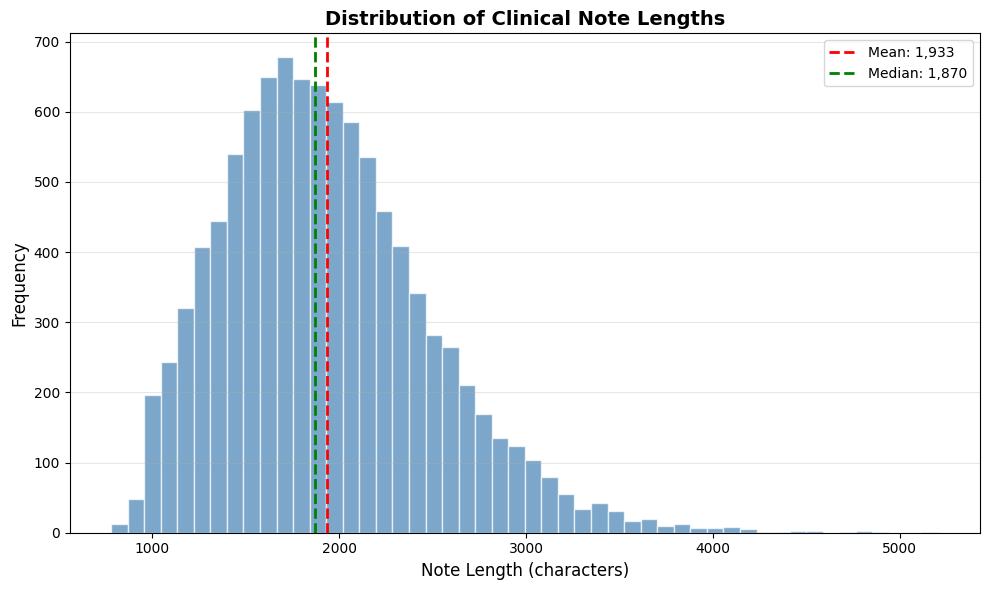

In [11]:
# ============================================================================
# Calculate Dataset Statistics
# ============================================================================

print("=" * 60)  # Print separator line
print("DATASET STATISTICS ANALYSIS")  # Print section header
print("=" * 60)  # Print separator line

# Calculate note lengths for all samples in the training set
print("\n📊 Calculating note length statistics...")  # Status message

# Extract all text lengths from the training set
all_lengths = [len(str(note)) for note in filtered_dataset[TEXT_COLUMN]]

# Calculate statistics using numpy
length_stats = {  # Dictionary of statistics
    'min': int(np.min(all_lengths)),  # Minimum length
    'max': int(np.max(all_lengths)),  # Maximum length
    'mean': float(np.mean(all_lengths)),  # Mean length
    'median': float(np.median(all_lengths)),  # Median length
    'std': float(np.std(all_lengths)),  # Standard deviation
    'q25': float(np.percentile(all_lengths, 25)),  # 25th percentile
    'q75': float(np.percentile(all_lengths, 75)),  # 75th percentile
}

# Display statistics
print(f"\n📈 Note Length Statistics (characters):")
print(f"   Minimum: {length_stats['min']:,}")  # Display min
print(f"   Maximum: {length_stats['max']:,}")  # Display max
print(f"   Mean: {length_stats['mean']:,.1f}")  # Display mean
print(f"   Median: {length_stats['median']:,.1f}")  # Display median
print(f"   Std Dev: {length_stats['std']:,.1f}")  # Display std dev
print(f"   25th Percentile: {length_stats['q25']:,.1f}")  # Display Q1
print(f"   75th Percentile: {length_stats['q75']:,.1f}")  # Display Q3

# ============================================================================
# Create Histogram Visualization
# ============================================================================

print(f"\n📊 Generating note length histogram...")  # Status message

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))  # Create figure with specified size

# Create histogram
ax.hist(all_lengths, bins=50, color='steelblue', edgecolor='white', alpha=0.7)  # Plot histogram

# Add vertical lines for mean and median
ax.axvline(length_stats['mean'], color='red', linestyle='--', linewidth=2, label=f"Mean: {length_stats['mean']:,.0f}")  # Mean line
ax.axvline(length_stats['median'], color='green', linestyle='--', linewidth=2, label=f"Median: {length_stats['median']:,.0f}")  # Median line

# Set labels and title
ax.set_xlabel('Note Length (characters)', fontsize=12)  # X-axis label
ax.set_ylabel('Frequency', fontsize=12)  # Y-axis label
ax.set_title('Distribution of Clinical Note Lengths', fontsize=14, fontweight='bold')  # Title

# Add legend
ax.legend(loc='upper right', fontsize=10)  # Add legend

# Add grid for readability
ax.grid(axis='y', alpha=0.3)  # Add horizontal grid lines

# Adjust layout
plt.tight_layout()  # Adjust spacing

# Save figure
fig_path = FIGURES_DIR / "note_length_distribution.png"  # Define save path
plt.savefig(fig_path, dpi=150, bbox_inches='tight')  # Save figure
print(f"   ✓ Saved to: {fig_path}")  # Confirmation

# Display the figure
plt.show()  # Show the plot

print("\n" + "=" * 60)  # Print separator line

---

# Chapter 4: Ground Truth Generation

---

## 4.1 Define Ground Truth Generation Function

Create a function to generate simplified text using Claude Opus 4.5 API.

In [12]:
# ============================================================================
# Define Ground Truth Generation Function
# ============================================================================

import time  # Import time module for delays

def generate_simplified_text(
    complex_text: str,  # The complex medical text to simplify
    client: anthropic.Anthropic,  # Anthropic API client
    max_retries: int = 3,  # Maximum number of retry attempts
) -> Optional[str]:
    """Generate simplified text using Claude Opus 4.5 API."""
    
    # Format the prompt using the template
    prompt = SIMPLIFY_PROMPT_TEMPLATE.format(  # Format prompt with template
        instruction=SIMPLIFICATION_INSTRUCTION,  # Simplification guidelines
        complex_text=complex_text  # The text to simplify
    )
    
    # Retry loop with exponential backoff
    for attempt in range(max_retries):  # Loop through retry attempts
        try:  # Try to make API call
            # Make API call to Claude
            response = client.messages.create(  # Create message
                model=TEACHER_MODEL,  # Use Claude Opus 4.5
                max_tokens=API_MAX_TOKENS,  # Maximum response tokens
                messages=[  # Messages list
                    {  # User message
                        "role": "user",  # Role is user
                        "content": prompt  # The prompt
                    }
                ]
            )
            
            # Extract and return the simplified text
            simplified_text = response.content[0].text  # Get text from response
            return simplified_text.strip()  # Return stripped text
            
        except anthropic.RateLimitError as e:  # Handle rate limit errors
            wait_time = API_RATE_LIMIT_DELAY * (2 ** attempt)  # Exponential backoff
            print(f"      ⚠️ Rate limit hit, waiting {wait_time}s (attempt {attempt + 1}/{max_retries})")  # Warning
            time.sleep(wait_time)  # Wait before retry
            
        except anthropic.APIError as e:  # Handle other API errors
            print(f"      ❌ API error: {e}")  # Print error
            if attempt < max_retries - 1:  # If not last attempt
                time.sleep(API_RATE_LIMIT_DELAY)  # Wait before retry
            else:  # Last attempt failed
                return None  # Return None to indicate failure
                
        except Exception as e:  # Handle unexpected errors
            print(f"      ❌ Unexpected error: {e}")  # Print error
            return None  # Return None to indicate failure
    
    return None  # Return None if all retries failed

print("✓ Ground truth generation function defined")  # Confirmation message

✓ Ground truth generation function defined


## 4.2 Load or Initialize Checkpoint

Load existing checkpoint if available, or initialize a new one.

In [13]:
# ============================================================================
# Load or Initialize Checkpoint
# ============================================================================

print("=" * 60)  # Print separator line
print("CHECKPOINT MANAGEMENT")  # Print section header
print("=" * 60)  # Print separator line

# Define checkpoint file path
checkpoint_path = CHECKPOINTS_DIR / "ground_truth_checkpoint.json"  # Path for checkpoint file

# Try to load existing checkpoint
if checkpoint_path.exists():  # Check if checkpoint exists
    print(f"\n📂 Found existing checkpoint: {checkpoint_path}")  # Status message
    with open(checkpoint_path, 'r') as f:  # Open checkpoint file
        checkpoint_data = json.load(f)  # Load checkpoint data
    ground_truth_labels = checkpoint_data.get("labels", [])  # Get existing labels
    processed_indices = set(checkpoint_data.get("processed_indices", []))  # Get processed indices
    print(f"   ✓ Loaded {len(ground_truth_labels)} existing labels")  # Confirmation
    print(f"   ✓ {len(processed_indices)} samples already processed")  # Status
else:  # No existing checkpoint
    print(f"\n📂 No existing checkpoint found")  # Status message
    print(f"   Initializing new checkpoint...")  # Status message
    ground_truth_labels = []  # Initialize empty labels list
    processed_indices = set()  # Initialize empty processed set
    print(f"   ✓ Initialized new checkpoint")  # Confirmation

print(f"\n📊 Checkpoint status:")  # Section header
print(f"   - Labels generated: {len(ground_truth_labels)}")  # Label count
print(f"   - Indices processed: {len(processed_indices)}")  # Processed count

CHECKPOINT MANAGEMENT

📂 Found existing checkpoint: medisimplifier/checkpoints/ground_truth_checkpoint.json
   ✓ Loaded 10020 existing labels
   ✓ 10020 samples already processed

📊 Checkpoint status:
   - Labels generated: 10020
   - Indices processed: 10020


## 4.3 Generate Ground Truth Labels

Generate simplified texts using Claude Opus 4.5 for all training samples.

In [53]:
# ============================================================================
# Generate Ground Truth Labels for Entire Dataset
# ============================================================================

print("=" * 60)  # Print separator line
print("GENERATING GROUND TRUTH LABELS")  # Print section header
print("=" * 60)  # Print separator line

# Initialize Anthropic client
client = anthropic.Anthropic()  # Create client using ANTHROPIC_API_KEY env var

# Combine all splits: Train (8K) + Validation (1K) + Test (1K) = 10K
all_texts_to_process = []  # Initialize list

for split_name in ['train', 'validation', 'test']:  # Loop through splits
    split_texts = dataset_splits[split_name][TEXT_COLUMN]  # Get texts for split
    for i, text in enumerate(split_texts):  # Loop through texts
        all_texts_to_process.append((split_name, i, text))  # Add tuple (split, index, text)

print(f"\n📊 Samples to process:")  # Display counts
print(f"   Train: {len(dataset_splits['train']):,}")  # Training count
print(f"   Validation: {len(dataset_splits['validation']):,}")  # Validation count
print(f"   Test: {len(dataset_splits['test']):,}")  # Test count
print(f"   Total: {len(all_texts_to_process):,}")  # Total count
print(f"\n📊 Already processed: {len(ground_truth_labels):,}")  # Display checkpoint count
print(f"📊 Remaining: {len(all_texts_to_process) - len(processed_indices):,}")  # Display remaining

# Log API configuration
print(f"\n🔧 API Configuration:")  # Section header
print(f"   Model: {TEACHER_MODEL}")  # Show model being used
print(f"   Max Tokens: {API_MAX_TOKENS}")  # Show max tokens
print(f"   Rate Limit Delay: {API_RATE_LIMIT_DELAY}s")  # Show delay
print(f"   Checkpoint Interval: {CHECKPOINT_INTERVAL}")  # Show checkpoint interval

# Test API connection before starting
print(f"\n🔌 Testing API connection...")  # Status message
try:
    test_response = client.messages.create(  # Test API call
        model=TEACHER_MODEL,  # Use configured model
        max_tokens=10,  # Minimal tokens for test
        messages=[{"role": "user", "content": "Say OK"}]  # Simple test
    )
    print(f"   ✓ API test successful: {test_response.content[0].text}")  # Confirmation
    print(f"   ✓ Model confirmed: {TEACHER_MODEL}")  # Show model
except Exception as e:
    print(f"   ❌ API test failed: {type(e).__name__}: {e}")  # Error details
    raise  # Stop execution if API fails

# Track statistics
stats = {  # Statistics dictionary
    "total_attempted": 0,  # Total API calls attempted
    "successful": 0,  # Successful calls
    "failed": 0,  # Failed calls
    "errors": [],  # List of errors
    "by_split": {"train": 0, "validation": 0, "test": 0},  # Count per split
}

# Generate simplified texts
print(f"\n🔄 Starting generation...")  # Status message
start_time = datetime.now()  # Record start time

for split, idx, complex_text in tqdm(all_texts_to_process, desc="Generating"):  # Loop through all
    # Create unique key for this sample
    sample_key = f"{split}_{idx}"  # Unique identifier
    
    # Skip if already processed
    if sample_key in processed_indices:  # Check if already done
        continue  # Skip to next
    
    stats["total_attempted"] += 1  # Increment attempt counter
    
    # Log every 100th sample for debugging
    if stats["total_attempted"] % 100 == 0:  # Every 100 samples
        print(f"\n   [{split}:{idx}] Processing ({len(complex_text)} chars)...")  # Log progress
    
    try:
        # Record API call start time
        api_start = datetime.now()  # Record API call start
        
        # Format the prompt
        prompt = SIMPLIFY_PROMPT_TEMPLATE.format(  # Create prompt
            instruction=SIMPLIFICATION_INSTRUCTION,  # Add instruction
            complex_text=complex_text  # Add medical text
        )
        
        # Log API request details (first call only or every 500)
        if stats["total_attempted"] == 1 or stats["total_attempted"] % 500 == 0:  # First or every 500
            print(f"\n   📤 API Request [{stats['total_attempted']}]:")  # Header
            print(f"      Model: {TEACHER_MODEL}")  # Model
            print(f"      Prompt Length: {len(prompt)} chars")  # Prompt length
        
        # Make the API call
        response = client.messages.create(  # API call
            model=TEACHER_MODEL,  # Model to use
            max_tokens=API_MAX_TOKENS,  # Maximum tokens
            messages=[{"role": "user", "content": prompt}]  # Message
        )
        
        api_duration = (datetime.now() - api_start).total_seconds()  # Calculate duration
        
        # Extract simplified text with safety check
        if response.content and len(response.content) > 0:  # Check if content exists
            simplified_text = response.content[0].text.strip()  # Get response text
        else:  # Empty response
            error_msg = f"{sample_key}: Empty response from API"  # Format error
            print(f"\n   ⚠️ {error_msg}")  # Log warning
            stats["failed"] += 1  # Increment failure counter
            stats["errors"].append(error_msg)  # Store error
            continue  # Skip to next sample
        
        # Log API response details (first call only or every 500)
        if stats["total_attempted"] == 1 or stats["total_attempted"] % 500 == 0:  # First or every 500
            print(f"   📥 API Response:")  # Header
            print(f"      Duration: {api_duration:.2f}s")  # Duration
            print(f"      Tokens: {response.usage.input_tokens} in / {response.usage.output_tokens} out")  # Tokens
        
        # Store the result
        ground_truth_labels.append({  # Add to results
            "split": split,  # Which split (train/validation/test)
            "index": idx,  # Sample index within split
            "sample_key": sample_key,  # Unique key
            "complex_text": complex_text,  # Original text
            "simplified_text": simplified_text,  # Simplified text
            "input_tokens": response.usage.input_tokens,  # Tokens used
            "output_tokens": response.usage.output_tokens,  # Tokens generated
        })
        
        processed_indices.add(sample_key)  # Mark as processed
        stats["successful"] += 1  # Increment success counter
        stats["by_split"][split] += 1  # Increment split counter
        
    except anthropic.APIError as e:  # API-specific errors
        error_msg = f"{sample_key}: {type(e).__name__}: {e}"  # Format error
        print(f"\n   ❌ {error_msg}")  # Log error
        stats["failed"] += 1  # Increment failure counter
        stats["errors"].append(error_msg)  # Store error
        
    except Exception as e:  # General errors
        error_msg = f"{sample_key}: {type(e).__name__}: {e}"  # Format error
        print(f"\n   ❌ {error_msg}")  # Log error
        stats["failed"] += 1  # Increment failure counter
        stats["errors"].append(error_msg)  # Store error
    
    # Rate limiting delay
    time.sleep(API_RATE_LIMIT_DELAY)  # Wait to avoid rate limits
    
    # Save checkpoint periodically
    if len(ground_truth_labels) % CHECKPOINT_INTERVAL == 0 and len(ground_truth_labels) > 0:  # Every CHECKPOINT_INTERVAL
        checkpoint_data = {  # Create checkpoint data
            "labels": ground_truth_labels,  # Labels list
            "processed_indices": list(processed_indices),  # Processed indices
        }
        with open(checkpoint_path, 'w') as f:  # Open file
            json.dump(checkpoint_data, f, indent=2)  # Save checkpoint
        elapsed = (datetime.now() - start_time).total_seconds() / 60  # Calculate elapsed time
        print(f"\n   💾 Checkpoint: {len(ground_truth_labels)} samples ({elapsed:.1f} min)")  # Confirm
        print(f"      Train: {stats['by_split']['train']}, Val: {stats['by_split']['validation']}, Test: {stats['by_split']['test']}")  # Split counts

# Final statistics
end_time = datetime.now()  # Record end time
total_duration = (end_time - start_time).total_seconds() / 60  # Calculate total duration

print(f"\n{'='*60}")  # Separator
print("GENERATION COMPLETE")  # Header
print(f"{'='*60}")  # Separator
print(f"\n📊 Final Statistics:")  # Stats header
print(f"   Total Attempted: {stats['total_attempted']}")  # Total attempts
print(f"   Successful: {stats['successful']}")  # Successes
print(f"   Failed: {stats['failed']}")  # Failures
print(f"   Success Rate: {100*stats['successful']/max(1,stats['total_attempted']):.1f}%")  # Success rate
print(f"\n📊 By Split:")  # Split stats
print(f"   Train: {stats['by_split']['train']}")  # Train count
print(f"   Validation: {stats['by_split']['validation']}")  # Val count
print(f"   Test: {stats['by_split']['test']}")  # Test count
print(f"\n⏱️ Duration: {total_duration:.1f} minutes")  # Duration
if stats['total_attempted'] > 0:  # If any attempts
    print(f"   Avg: {total_duration*60/stats['total_attempted']:.2f} sec/sample")  # Avg time

if stats["errors"]:  # If errors
    print(f"\n⚠️ Errors ({len(stats['errors'])}):")  # Error header
    for err in stats["errors"][:5]:  # Show first 5
        print(f"   - {err}")  # Print error

# Save final checkpoint
checkpoint_data = {"labels": ground_truth_labels, "processed_indices": list(processed_indices)}  # Final data
with open(checkpoint_path, 'w') as f:  # Open file
    json.dump(checkpoint_data, f, indent=2)  # Save
print(f"\n✓ Final checkpoint: {checkpoint_path}")  # Confirmation
print(f"✓ Total ground truth labels: {len(ground_truth_labels)}")  # Total count

GENERATING GROUND TRUTH LABELS

📊 Samples to process:
   Train: 8,000
   Validation: 1,000
   Test: 1,000
   Total: 10,000

📊 Already processed: 3,446
📊 Remaining: 6,554

🔧 API Configuration:
   Model: claude-opus-4-5-20251101
   Max Tokens: 1024
   Rate Limit Delay: 1.0s
   Checkpoint Interval: 100

🔌 Testing API connection...
   ✓ API test successful: OK
   ✓ Model confirmed: claude-opus-4-5-20251101

🔄 Starting generation...


Generating:   0%|          | 0/10000 [00:00<?, ?it/s]


   📤 API Request [1]:
      Model: claude-opus-4-5-20251101
      Prompt Length: 3143 chars
   📥 API Response:
      Duration: 3.21s
      Tokens: 729 in / 48 out

   ⚠️ train_1854: Empty response from API

   💾 Checkpoint: 3500 samples (10.0 min)
      Train: 54, Val: 0, Test: 0

   [train:3408] Processing (1942 chars)...

   💾 Checkpoint: 3600 samples (29.3 min)
      Train: 154, Val: 0, Test: 0

   [train:3508] Processing (1967 chars)...

   💾 Checkpoint: 3700 samples (50.4 min)
      Train: 254, Val: 0, Test: 0

   [train:3724] Processing (2309 chars)...

   💾 Checkpoint: 3800 samples (69.9 min)
      Train: 354, Val: 0, Test: 0

   [train:3824] Processing (1380 chars)...

   💾 Checkpoint: 3900 samples (88.8 min)
      Train: 454, Val: 0, Test: 0

   [train:3924] Processing (2732 chars)...

   📤 API Request [500]:
      Model: claude-opus-4-5-20251101
      Prompt Length: 3628 chars
   📥 API Response:
      Duration: 10.67s
      Tokens: 845 in / 575 out

   💾 Checkpoint: 4000 sam

## 4.4 Quality Check Samples

Display sample pairs and verify simplification quality.

In [14]:
# =============================================================================
# Cell: Validate Ground Truth Data 
# =============================================================================

import json
from collections import Counter

# Load the ground truth checkpoint
CHECKPOINT_PATH = "medisimplifier/checkpoints/ground_truth_checkpoint.json"

with open(CHECKPOINT_PATH, "r") as f:
    data = json.load(f)

all_samples = data['labels']

print("=" * 70)
print("DATA VALIDATION REPORT")
print("=" * 70)

# Use correct key names
SOURCE_KEY = 'complex_text'
SIMPLIFIED_KEY = 'simplified_text'

# =============================================================================
# 1. Missing/Empty check
# =============================================================================
print("\n[1] MISSING DATA CHECK")
print("-" * 50)

missing_source = sum(1 for s in all_samples if s.get(SOURCE_KEY) is None)
missing_simplified = sum(1 for s in all_samples if s.get(SIMPLIFIED_KEY) is None)
empty_source = sum(1 for s in all_samples if s.get(SOURCE_KEY) and len(s[SOURCE_KEY].strip()) == 0)
empty_simplified = sum(1 for s in all_samples if s.get(SIMPLIFIED_KEY) and len(s[SIMPLIFIED_KEY].strip()) == 0)

print(f"Missing source:     {missing_source}")
print(f"Empty source:       {empty_source}")
print(f"Missing simplified: {missing_simplified}")
print(f"Empty simplified:   {empty_simplified}")

# =============================================================================
# 2. Duplicate check
# =============================================================================
print("\n[2] DUPLICATE CHECK")
print("-" * 50)

source_texts = [s[SOURCE_KEY] for s in all_samples]
source_counts = Counter(source_texts)
duplicate_sources = {k: v for k, v in source_counts.items() if v > 1}

print(f"Total samples:        {len(all_samples)}")
print(f"Unique sources:       {len(source_counts)}")
print(f"Duplicate sources:    {len(duplicate_sources)}")
print(f"Extra rows (dupes):   {sum(duplicate_sources.values()) - len(duplicate_sources)}")

# =============================================================================
# 3. Clean data
# =============================================================================
print("\n[3] CLEANING DATA")
print("-" * 50)

seen_sources = set()
clean_samples = []
removed_duplicates = 0
removed_empty = 0

for sample in all_samples:
    source = sample.get(SOURCE_KEY, '')
    simplified = sample.get(SIMPLIFIED_KEY, '')
    
    if not source.strip() or not simplified.strip():
        removed_empty += 1
        continue
    
    if source in seen_sources:
        removed_duplicates += 1
        continue
    
    seen_sources.add(source)
    clean_samples.append(sample)

print(f"Removed (empty):      {removed_empty}")
print(f"Removed (duplicates): {removed_duplicates}")
print(f"Clean samples:        {len(clean_samples)}")

# =============================================================================
# 4. Token stats
# =============================================================================
print("\n[4] TOKEN STATISTICS")
print("-" * 50)

total_input = sum(s.get('input_tokens', 0) for s in clean_samples)
total_output = sum(s.get('output_tokens', 0) for s in clean_samples)

print(f"Total input tokens:  {total_input:,}")
print(f"Total output tokens: {total_output:,}")
print(f"Avg input/sample:    {total_input / len(clean_samples):,.0f}")
print(f"Avg output/sample:   {total_output / len(clean_samples):,.0f}")

# =============================================================================
# 5. Save cleaned data
# =============================================================================
print("\n[5] SAVE CLEANED DATA")
print("-" * 50)

CLEAN_PATH = "medisimplifier/checkpoints/ground_truth_clean.json"

clean_data = {
    'labels': clean_samples,
    'total_input_tokens': total_input,
    'total_output_tokens': total_output
}

with open(CLEAN_PATH, "w") as f:
    json.dump(clean_data, f, indent=2)

print(f"✓ Saved to: {CLEAN_PATH}")

# =============================================================================
# Summary
# =============================================================================
print("\n" + "=" * 70)
print("SUMMARY")
print("=" * 70)
print(f"Original:  {len(all_samples)}")
print(f"Clean:     {len(clean_samples)}")
print(f"Removed:   {removed_empty + removed_duplicates}")
print(f"Status:    {'✓ READY' if len(clean_samples) >= 10000 else '⚠ CHECK DATA'}")

DATA VALIDATION REPORT

[1] MISSING DATA CHECK
--------------------------------------------------
Missing source:     0
Empty source:       0
Missing simplified: 0
Empty simplified:   0

[2] DUPLICATE CHECK
--------------------------------------------------
Total samples:        10020
Unique sources:       9999
Duplicate sources:    21
Extra rows (dupes):   21

[3] CLEANING DATA
--------------------------------------------------
Removed (empty):      0
Removed (duplicates): 21
Clean samples:        9999

[4] TOKEN STATISTICS
--------------------------------------------------
Total input tokens:  6,886,833
Total output tokens: 4,558,675
Avg input/sample:    689
Avg output/sample:   456

[5] SAVE CLEANED DATA
--------------------------------------------------
✓ Saved to: medisimplifier/checkpoints/ground_truth_clean.json

SUMMARY
Original:  10020
Clean:     9999
Removed:   21
Status:    ⚠ CHECK DATA


In [15]:
# ============================================================================
# Quality Check of Ground True Labled Data: Display Sample Pairs
# ============================================================================

import json  # Import json module
import random  # Import random module
import textstat  # Import textstat for readability metrics
import numpy as np  # Import numpy for calculations

# Define readability calculation function
def calculate_readability(text: str) -> dict:
    """Calculate Flesch-Kincaid Grade Level and Flesch Reading Ease."""
    if not text or len(text.split()) < 3:  # Check if text is too short
        return {  # Return default values for invalid text
            "flesch_kincaid_grade": 0.0,  # Default grade level
            "flesch_reading_ease": 0.0,  # Default reading ease
        }
    return {  # Return readability scores
        "flesch_kincaid_grade": textstat.flesch_kincaid_grade(text),  # Grade level (lower is simpler)
        "flesch_reading_ease": textstat.flesch_reading_ease(text),  # Reading ease (higher is simpler)
    }

# Load the clean ground truth data
with open("medisimplifier/checkpoints/ground_truth_clean.json", "r") as f:  # Open file
    data = json.load(f)  # Load JSON data
    ground_truth_labels = data["labels"]  # Extract labels list

print(f"✓ Loaded {len(ground_truth_labels)} clean samples")  # Confirmation

print("=" * 60)  # Print separator line
print("QUALITY CHECK OF GROUND TRUE LABLED DATA: SAMPLE PAIRS")  # Print section header
print("=" * 60)  # Print separator line

# Number of samples to display
NUM_SAMPLES_TO_DISPLAY = 3  # Show 3 random samples

# Select random samples
sample_indices = random.sample(range(len(ground_truth_labels)), NUM_SAMPLES_TO_DISPLAY)  # Random selection

# Display each sample pair
for i, sample_idx in enumerate(sample_indices, 1):  # Iterate through samples
    sample = ground_truth_labels[sample_idx]  # Get sample
    
    # Calculate readability metrics
    original_readability = calculate_readability(sample["complex_text"])  # Original readability
    simplified_readability = calculate_readability(sample["simplified_text"])  # Simplified readability
    
    print(f"\n{'='*60}")  # Print separator
    print(f"SAMPLE {i} (Index: {sample_idx})")  # Print sample header
    print(f"{'='*60}")  # Print separator
    
    print(f"\n📄 ORIGINAL (Flesch-Kincaid: {original_readability['flesch_kincaid_grade']:.1f}):")  # Original header
    print(f"-" * 40)  # Separator
    original_text = sample["complex_text"]  # Get original text
    print(original_text[:500] + "..." if len(original_text) > 500 else original_text)  # Truncated original
    
    print(f"\n📝 SIMPLIFIED (Flesch-Kincaid: {simplified_readability['flesch_kincaid_grade']:.1f}):")  # Simplified header
    print(f"-" * 40)  # Separator
    simplified_text = sample["simplified_text"]  # Get simplified text
    print(simplified_text[:500] + "..." if len(simplified_text) > 500 else simplified_text)  # Truncated simplified
    
    # Calculate improvement
    grade_improvement = original_readability['flesch_kincaid_grade'] - simplified_readability['flesch_kincaid_grade']  # Grade improvement
    print(f"\n📊 Readability Improvement: {grade_improvement:+.1f} grade levels")  # Print improvement

# Calculate overall statistics
print(f"\n{'='*60}")  # Print separator
print("OVERALL QUALITY STATISTICS OF LABLED DATA")  # Print header
print(f"{'='*60}")  # Print separator

# Calculate average readability for all samples (sample up to 100)
all_original_grades = []  # List for original grades
all_simplified_grades = []  # List for simplified grades

for sample in ground_truth_labels[:min(10000, len(ground_truth_labels))]:  # Scan entire dataset to claculate averages 
    orig_read = calculate_readability(sample["complex_text"])  # Original readability
    simp_read = calculate_readability(sample["simplified_text"])  # Simplified readability
    all_original_grades.append(orig_read["flesch_kincaid_grade"])  # Add original grade
    all_simplified_grades.append(simp_read["flesch_kincaid_grade"])  # Add simplified grade

print(f"\n📊 Average Original Flesch-Kincaid: {np.mean(all_original_grades):.1f}")  # Mean original
print(f"📊 Average Simplified Flesch-Kincaid: {np.mean(all_simplified_grades):.1f}")  # Mean simplified
print(f"📊 Average Improvement: {np.mean(all_original_grades) - np.mean(all_simplified_grades):.1f} grade levels")  # Mean improvement
print(f"📌 Target Reading Level: Grade {TARGET_READING_LEVEL}")  # Show target

✓ Loaded 9999 clean samples
QUALITY CHECK OF GROUND TRUE LABLED DATA: SAMPLE PAIRS

SAMPLE 1 (Index: 1824)

📄 ORIGINAL (Flesch-Kincaid: 16.5):
----------------------------------------
Discharge Summary

Patient Name: N/A
Medical Record Number: N/A
Admission Date: N/A
Discharge Date: N/A

Hospital Course Summary:

A 36-year-old Japanese man with a 14-month history of HIV infection was admitted to the hospital with various symptoms, including fever, pulsating headache, lumbago, nausea, and vomiting. Although he was receiving highly active anti-retroviral therapy (HAART) consisting of lamivudine, azidothymidine, and lopinavir plus ritonavir for pneumocystis pneumonia, his CD4-po...

📝 SIMPLIFIED (Flesch-Kincaid: 9.3):
----------------------------------------
Discharge Summary

Patient Name: N/A
Medical Record Number: N/A
Admission Date: N/A
Discharge Date: N/A

Hospital Course Summary:

A 36-year-old Japanese man with HIV infection for 14 months was admitted to the hospital. He had fever,

## 4.5 Split into Train/Validation/Test

Split the 9,999 labeled pairs (complex + simplified) into training, validation, and test sets.

| Split | Percentage | Purpose |
|-------|------------|---------|
| **Train** | 80% | LoRA fine-tuning |
| **Validation** | 10% | Hyperparameter tuning, early stopping |
| **Test** | 10% | Final evaluation (baseline + fine-tuned) |

In [16]:
# ============================================================================
# Split Ground Truth Data into Train/Validation/Test
# ============================================================================

import json  # Import json module
import random  # Import random module

print("=" * 60)  # Print separator line
print("SPLITTING LABELED DATA INTO TRAIN/VAL/TEST")  # Print section header
print("=" * 60)  # Print separator line

# Load the clean ground truth data
print("\n📂 Loading clean ground truth data...")  # Status message
with open("medisimplifier/checkpoints/ground_truth_clean.json", "r") as f:  # Open file
    data = json.load(f)  # Load JSON data
    ground_truth_labels = data["labels"]  # Extract labels list

print(f"   ✓ Loaded {len(ground_truth_labels)} labeled pairs")  # Confirmation

# ============================================================================
# Define Split Ratios
# ============================================================================

SEED = 42  # Random seed for reproducibility
TRAIN_RATIO = 0.80  # 80% for training
VAL_RATIO = 0.10  # 10% for validation
TEST_RATIO = 0.10  # 10% for testing

# Calculate split sizes
total_samples = len(ground_truth_labels)  # Total number of samples
train_size = int(total_samples * TRAIN_RATIO)  # Training set size
val_size = int(total_samples * VAL_RATIO)  # Validation set size
test_size = total_samples - train_size - val_size  # Test set size (remainder)

print(f"\n📊 Split Configuration:")  # Section header
print(f"   Total samples: {total_samples:,}")  # Display total
print(f"   Train: {train_size:,} ({TRAIN_RATIO*100:.0f}%)")  # Display train size
print(f"   Validation: {val_size:,} ({VAL_RATIO*100:.0f}%)")  # Display val size
print(f"   Test: {test_size:,} ({TEST_RATIO*100:.0f}%)")  # Display test size

# ============================================================================
# Shuffle and Split
# ============================================================================

print(f"\n🔀 Shuffling with seed={SEED}...")  # Status message
random.seed(SEED)  # Set random seed for reproducibility
shuffled_data = ground_truth_labels.copy()  # Create a copy to shuffle
random.shuffle(shuffled_data)  # Shuffle in place

# Split the data
print(f"✂️  Splitting data...")  # Status message
train_data = shuffled_data[:train_size]  # First portion for training
val_data = shuffled_data[train_size:train_size + val_size]  # Middle portion for validation
test_data = shuffled_data[train_size + val_size:]  # Remaining for test

# Create splits dictionary
dataset_splits = {  # Dictionary containing all splits
    "train": train_data,  # Training set
    "validation": val_data,  # Validation set
    "test": test_data  # Test set
}

# ============================================================================
# Verify Splits
# ============================================================================

print(f"\n✓ Splits created successfully!")  # Success message
print(f"\n📊 Final Split Sizes:")  # Section header
for split_name, split_data in dataset_splits.items():  # Iterate through splits
    print(f"   {split_name}: {len(split_data):,} samples")  # Display split size

# Verify total matches
total_in_splits = sum(len(split) for split in dataset_splits.values())  # Sum all splits
print(f"\n   Total: {total_in_splits:,} samples")  # Display total
assert total_in_splits == total_samples, "Split sizes don't match total!"  # Verify

# ============================================================================
# Save Splits to Disk
# ============================================================================

print(f"\n💾 Saving splits to disk...")  # Status message

# Define save path
splits_path = Path("medisimplifier/data/labeled_splits.json")  # Path for splits file

# Save as JSON
splits_to_save = {  # Data structure to save
    "train": train_data,  # Training data
    "validation": val_data,  # Validation data
    "test": test_data,  # Test data
    "metadata": {  # Metadata about the splits
        "total_samples": total_samples,  # Total count
        "train_size": train_size,  # Train count
        "val_size": val_size,  # Val count
        "test_size": test_size,  # Test count
        "seed": SEED,  # Random seed used
        "source": "ground_truth_clean.json"  # Source file
    }
}

with open(splits_path, "w") as f:  # Open file for writing
    json.dump(splits_to_save, f, indent=2)  # Save with formatting

print(f"   ✓ Saved to: {splits_path}")  # Confirmation

# ============================================================================
# Display Sample from Each Split
# ============================================================================

print(f"\n📋 Sample from each split:")  # Section header
print("-" * 40)  # Separator

for split_name, split_data in dataset_splits.items():  # Iterate through splits
    sample = split_data[0]  # Get first sample
    complex_preview = sample["complex_text"][:100] + "..."  # Truncate complex text
    simplified_preview = sample["simplified_text"][:100] + "..."  # Truncate simplified text
    print(f"\n{split_name.upper()}:")  # Split name
    print(f"   Complex: {complex_preview}")  # Show complex preview
    print(f"   Simplified: {simplified_preview}")  # Show simplified preview

print("\n" + "=" * 60)  # Print separator line
print("✓ Data splitting complete!")  # Final confirmation

SPLITTING LABELED DATA INTO TRAIN/VAL/TEST

📂 Loading clean ground truth data...
   ✓ Loaded 9999 labeled pairs

📊 Split Configuration:
   Total samples: 9,999
   Train: 7,999 (80%)
   Validation: 999 (10%)
   Test: 1,001 (10%)

🔀 Shuffling with seed=42...
✂️  Splitting data...

✓ Splits created successfully!

📊 Final Split Sizes:
   train: 7,999 samples
   validation: 999 samples
   test: 1,001 samples

   Total: 9,999 samples

💾 Saving splits to disk...
   ✓ Saved to: medisimplifier/data/labeled_splits.json

📋 Sample from each split:
----------------------------------------

TRAIN:
   Complex: Discharge Summary:

Patient Information:
Name: [Patient's Name]
DOB: [Patient's Date of Birth]
Gende...
   Simplified: Discharge Summary:

Patient Information:
Name: [Patient's Name]
DOB: [Patient's Date of Birth]
Gende...

VALIDATION:
   Complex: Discharge Summary:

Patient Name: [Name]
Sex: Male
Age: 47 days
Admission Date: [Date]
Discharge Dat...
   Simplified: Discharge Summary:

Patient Na